# Financial Fundamentals
- Portfolio Allocation
- Sharpe Ratio
- Portfolio Optimization
- Efficient Frontier
- CAPM - Capital Asset Pricing Model

## Portfolio and Statistics
A portfolio is just a set of allocations in a variety of securities. For example: 20% in AAPL, 30% in FB, 50% in GOOG

### Key statistics
- Daily Returns - The percentage returned from 1 day to the next for a stock.
- Cumulative Return - The amount returned after an entire time period
- Avg. Daily Return - Mean of Daily Returns
- Std. Daily Return - Std. Dev of Daily Returns

### Sharpe Ratio
The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. It was developed by Nobel Laureate William F. Sharpe.

$SR = \dfrac{r_p - r_f}{\sigma_p}$

- $r_p$ is expected portfolio return
- $r_f$ is risk-free return
- $\sigma_p$ is porfolio standard deviation

Risk free return is the return you would receive if you put your money in an investment such as a bank savings account, LIBOR, Treasury Bonds that are essentially "risk-free".

Currently in the United State (early 2017), these returns are very close to 0%, so its just easier to approximate $r_f$ as 0. Keep in mind though, the Federal Reserve may continue to raise interest rates in the future, effecting this result!!

- For now, assuming $r_f$ is 0, so **SR = Mean Return / Std.Dev.**
- Keep in mind that Sharpe Ratio originally thought of this as a yearly metric (as in mean yearly return vs. mean daily return). This is easy to fix though.

### Annualized Sharpe Ratio
The annualized Sharpe Ratio can be obtained by multiplying against a K-Factor based off your Sampling Rate:
- Daily: K = sqrt(252)
- Weekly: K = sqrt(52)
- Monthly: K = sqrt(12)

So $ASR = K \times SR$

# Code along Portfolio Allocation & Sharpe Ratio

In [1]:
import pandas as pd
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco  = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [4]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [5]:
# Cumulated return, also known as normalized price
for stock_df in (aapl, cisco, ibm, amzn): 
    stock_df['Normed return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']
    

In [6]:
aapl.tail()

,Adj. Close,Normed return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [7]:
# 30% in apple
# 20% in cisco
# 40% in amazon
# 10% in ibm

for stock_df, allo in zip((aapl, cisco, ibm, amzn), [.3, .2, .4, .1]):
    stock_df['Allocation'] = stock_df['Normed return'] * allo

In [8]:
aapl.tail()

,Adj. Close,Normed return,Allocation
Date,,,
2016-12-23,115.080808,2.177549,0.653265
2016-12-27,115.811668,2.191378,0.657413
2016-12-28,115.317843,2.182034,0.654610
2016-12-29,115.288214,2.181473,0.654442
2016-12-30,114.389454,2.164467,0.649340


In [9]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position values'] = stock_df['Allocation'] * 1000000

In [10]:
aapl.head()

,Adj. Close,Normed return,Allocation,Position values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [11]:
all_pos_vals = [aapl['Position values'], cisco['Position values'], ibm['Position values'], amzn['Position values']]


In [12]:
portfolio_val = pd.concat(all_pos_vals, axis = 1)

In [13]:
portfolio_val.head()

,Position values,Position values,Position values,Position values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [14]:
portfolio_val.columns=['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']

In [15]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

In [16]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Total Portfolio Value')

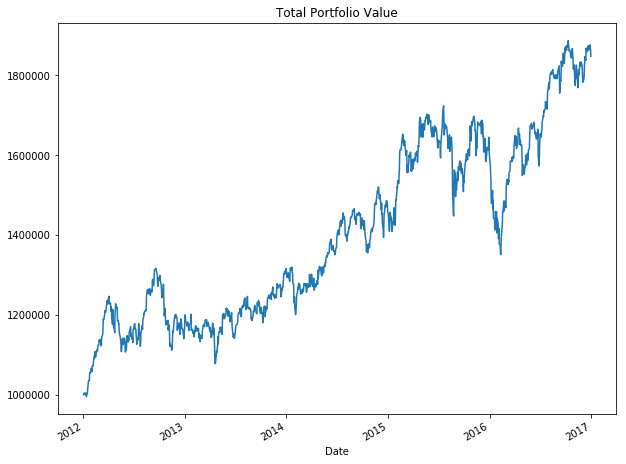

In [18]:
portfolio_val['Total Pos'].plot(figsize = (10, 8))
plt.title('Total Portfolio Value')

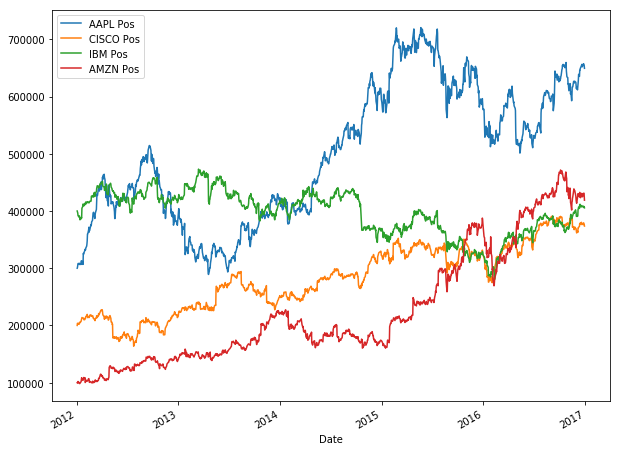

In [19]:
portfolio_val.drop('Total Pos', axis = 1).plot(figsize = (10, 8))

In [20]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


## Portflio Statistics

In [21]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [22]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [23]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [24]:
portfolio_val['Daily Return'].std()

0.010568287769161718

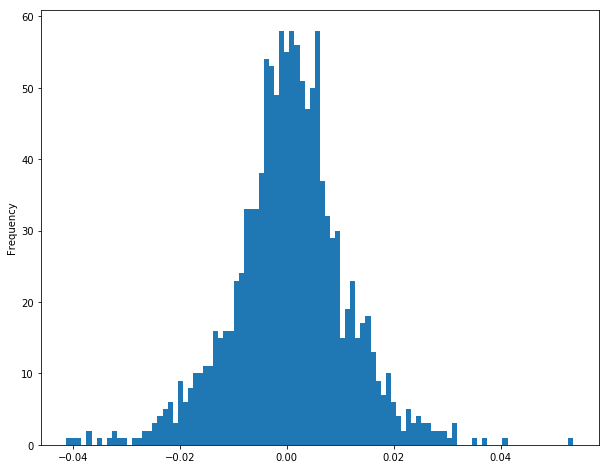

In [25]:
portfolio_val['Daily Return'].plot(kind='hist', bins = 100, figsize = (10, 8))

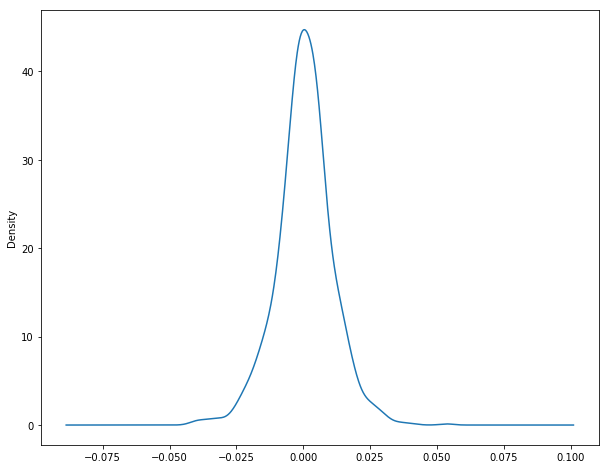

In [26]:
portfolio_val['Daily Return'].plot(kind='kde', figsize = (10, 8))

In [27]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] - 1)

In [28]:
cumulative_return

84.74285181665545

In [29]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [30]:
SR

0.05149680662648092

In [31]:
ASR = (252 ** 0.5) * SR

In [32]:
ASR

0.8174864618859096

### Is this sharpe ratio considered good?

A sharpe ratio greater than one is considered acceptable to good by investors depending on your risk tolerance. 

A ratio higher than 2 is usually rated as very good; a ratio of 3 or higher is considered to be excellent (very rare cases). 

The basic purpose of the Sharpe ratio is to allow investors to analyze how much greater a return one is obtaining in relation to the level of additional risk taken to generate that return. 

## Portfolio Optimization
Now that we have a nice metric to evaluate Portfolio Allocations against each other, how can we optimize the portoflio holding?

We just guess and check a bunch of random allocations and see which one has the best Sharpe Ratio! Since we have powerful computer and numpy's random number function, the strategy works for us.

Randomly guessing and checking is sometimes known as a Monte Carlo Simulation. We randomly assign a weight to each security in our portfolio, then calculate its mean daily return and std. dev. of daily return.

This allows us to calculate the Sharpe Ratio for thousands of randomly selected allocations. We can then plot the allocations on chart showing return vs. volatility, colored by the Sharpe Ratio.

<img src="EfficientFrontier.png">

We're going to end up creating the above chart where y axis is the return and x axis is the volatility, and the color bar is the third dimention of the sharpe ratio. Red dot indicates the highest Sharpe Ratio on this plot.

### Minimization

However, guessing and checking is not very efficient, instead we can use math to figure out the optimal Sharpe Ratio for any given portfolio. This is known as an optimazation algorithm. To really understand optimization algorithm, we need to understand minimization.

Example: What value of x will minimize y?
- $y = x^2$  --> x = 0
- $y = (2 - x) ^2$ --> x = 2

This idea of using a minimizer will allow us to build an optimizer. For more complex equations, SciPy can do the heavy math for us!


### Relationship between minimization and sharpe ratio
We want to actually maximize the Sharpe Ratio, meaning we can create an optimizer that will attempt to minimize the inverse Sharpe Ratio!

We will use SciPy's built-in optimization algorithms to calculate the optimal weight allocation for our portfolio (optimized by Sharpe Ratio).

## Efficient Frontier
<img src="EfficientFrontier_borded.png">

# Portfolio Optimization code along

## Monte Carlo Simulation

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
ibm.head()

,Adj. Close,Normed return,Allocation,Position values
Date,,,,
2012-01-03,157.578371,1.000000,0.400000,400000.000000
2012-01-04,156.935540,0.995921,0.398368,398368.223296
2012-01-05,156.191208,0.991197,0.396479,396478.797638
2012-01-06,154.398046,0.979817,0.391927,391926.999463
2012-01-09,153.594506,0.974718,0.389887,389887.278583


In [35]:
stocks = pd.concat([aapl['Adj. Close'], cisco['Adj. Close'], ibm['Adj. Close'], amzn['Adj. Close']], axis = 1)

In [36]:
stocks.columns = ['aapl', 'cisco', 'ibm', 'amzn']
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [37]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [38]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [41]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [42]:
# log returns are easy to work with
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


<function matplotlib.pyplot.tight_layout>

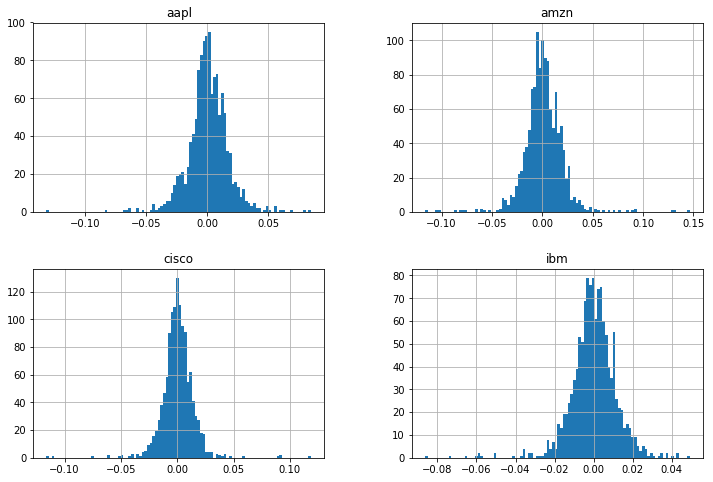

In [43]:
log_ret.hist(bins=100, figsize = (12, 8))
plt.tight_layout

In [44]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [67]:
log_ret.cov() * 252  
# 252 business days

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [68]:
import time

In [70]:
#np.random.seed(101)
start_time = time.time()
num_ports = 10000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)

    # Save the weights
    all_weights[ind, :] = weights
    
    # Expected return
    exp_ret = np.sum(log_ret.mean() * weights *  252) 
    ret_arr[ind] = exp_ret

    # Expected volatility
    exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    vol_arr[ind] = exp_vol
    
    #Sharpe Ratio
    SR = exp_ret / exp_vol
    sharpe_arr[ind] = SR

print("Iterated {x} times, took {y} seconds".format(x = num_ports, y = (time.time() - start_time)))

Iterated 10000 times, took 12.1389260292 seconds


In [81]:
sharpe_arr.max()

1.029210056484699

In [82]:
sharpe_arr.argmax()

852

In [83]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

In [84]:
all_weights[sharpe_arr.argmax(), :]

array([0.26455872, 0.19092709, 0.00405137, 0.54046281])

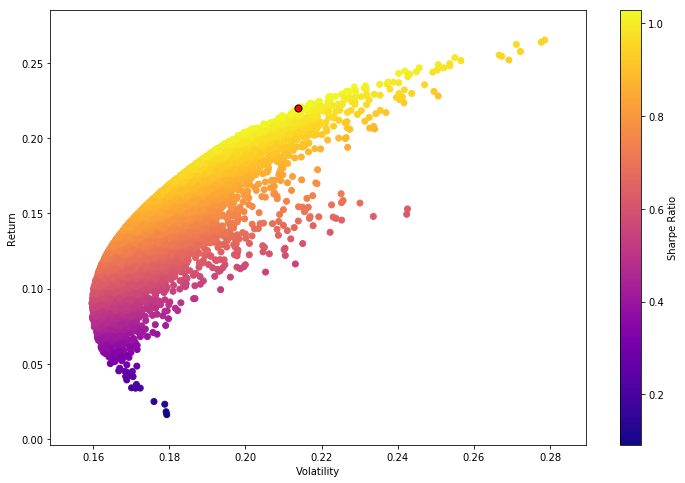

In [89]:
plt.figure(figsize = (12, 8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c = 'red', s = 50, edgecolors='black')

## Mathmatical optimization
For more details about minimize, check the SciPy documentation.

In [109]:
def get_ret_vol_sr(weights): 
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

In [110]:
from scipy.optimize import minimize

In [111]:
def neg_sharpe(weights): 
    return get_ret_vol_sr(weights)[2] * -1

In [112]:
def check_sum(weights):
    # return 0 if the sum of the weights is 1
    return np.sum(weights) - 1

In [113]:
cons = ({'type': 'eq', 'fun': check_sum})

In [114]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [115]:
init_guess = [0.25, 0.25, 0.25, 0.25]

In [116]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [117]:
opt_results

     fun: -1.0307168703346878
     jac: array([ 5.64306974e-05,  4.18275595e-05,  3.39921713e-01, -4.45246696e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628978, 0.20418982, 0.        , 0.5295204 ])

In [118]:
opt_results.x

array([0.26628978, 0.20418982, 0.        , 0.5295204 ])

In [119]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [120]:
frontier_y = np.linspace(0, 0.3, 100)

In [121]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [123]:
frontier_volatility = []
for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun': check_sum},
           {'type': 'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds = bounds, constraints=cons)
    frontier_volatility.append(result['fun'])

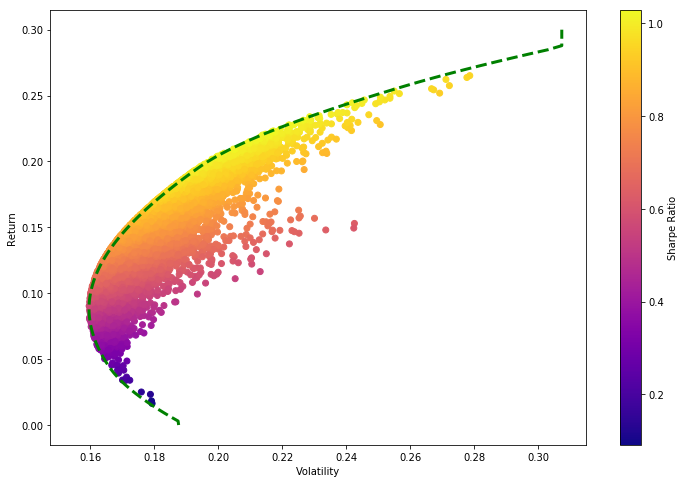

In [124]:
plt.figure(figsize = (12, 8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility, frontier_y, 'g--', linewidth=3)

# Key Financial Topics
- Types of funds
- Order Books
- Latency Arbitrage (HFT)
- Short Selling

## Types of funds
There are 3 major fund types:
- ETF - Exchange Traded Funds
- Mutual Funds
- Hedge Funds

These funds vary by fees, transparency, regulation, and more.

### ETF
ETFs are exchange traded funds that are constituted of a basket of funds, bonds, commodities, etc...
Their holdings are completely public and transparent and individuals can buy and trade the marketable security.

Typically, people invest in ETFs are more interested in a diversified portfolio and want to keep their investment in an ETF for a longer period of time.

One of the most common ETFs is the Spider (SPY) which tracks the S&P500

### Mutual Fund
A mutual fund is an investment vehicle made up of a pool of funds collected from many investors for the purpose of investing in securities such as stocks, bonds, money market instruments and similar assets.

Mutual funds are operated by money managers, who invest the fund's capital and attempt to produce capital gains and income for the fund's investors.

A mutual fund's portfolio is structured and maintained to match the investment objectives stated in its prospectus.

Mutual funds disclose their holdings typically once a quarter, although this can vary by fund.

### Hedge Fund
Hedge funds are alternative investments using pooled funds that employ numerous different strategies to earn active return, or **alpha**, for their investors.

Hedge funds may be aggressively managed or make use of derivatives and leverage in both domestic and international markets with the goal of generating high returns (either in an absolute sense or over a specified market benchmark).

It is important to note that hedge funds are generally only accessible to accredited investors as they require less SEC regulations that other funds.

One aspect that has set the hedge fund industry apart is the fact that hedge funds face less regulation than mutual funds and other investment vehicles. 

Much of what the course does mimics the way a hedge fund would operate.

## Fees associated with these funds
- ETF funds
    - Expense Ratio: 0.01% - 1%
- Mutual funds
    - Expense Ratio: 0.5% - 3%
- Hedge funds
    - Expense Ratio: 2% of Fund, 20% of profits

### Liquidity of these funds
- EFT
    - Buy/Sell just like a stock
- Mutual Funds
    - Buy/Sell at end of day through broker
- Hedge Funds
    - Depends on agreement

# Order Books
Making an order includes the following:
- Buy or sell
- Symbol
- Number of Shares
- Limit or Market
    - Limit is associated with price, which is the price limit you want to buy or sell
    - Market order - buy or sell at whatever the current market will accept
    - Examples:
        - BUY, AAPL, 200, MARKET
        - SELL, TSLA, 400, MARKET
        - BUY, AMD, 2000, LIMIT, 13.95
        - SELL, NVDA, 150, LIMIT, 160.99
- Price (Only needed for a Limit order)

Once you've sent an order (usually to your broker), it goes to an exchange (for a larger order it can go to multiple exchanges, but more on that later)

Once an exchange receives your order, it goes into an order book.

## Build out an order book
<img src="SimpleOrderBooks.png">

For a very popular stock there's hundreds of thousands of orders coming in all the time, so this would happen very very quickly.

[Real Order Book from NASDAQ](https://data.nasdaq.com/BookViewer.aspx)

## How does an order actually get to the exchange?
Let's walk through the steps. Also explain how certain HFT firms can attempt Latency Arbitrage!!

<img src="OrderFlow.png">
You initiate an order, then you connect to your broker through an app or website, then your broker send the order to the exchange and log in their order book to match an order, then get your money/stock back to your broker. And broker take some fee for doing that whole process for you.

Another case which more realistic is the broker will match your order and other clients' order within the boundary of broker without actually reach in the exchange. By law at least in the U.S., the broker must provide the same price you could have gotten on the exchange. So whatever the best prices in the exchange, the broker must have provided that to you if they do the interaction of the broker.

## Dark Pool
<img src="DarkPool.png" >
Imagine that you send a buy order for particular stock to your broker and another person is selling the same stock from different broker. This could end up that both these orders go to a dark pool first and never actually reached the exchanges. 

So a dark pool pays brokers to see order before they hit the exchange. It's essentially just a private exchange or forum for trading securities, though it is a really a ominous souding term. However, unlike exchanges, they are not really accessible to the public, they are not transparent.

Because of their lack of transparency, there is some potential conflicts of interest by their owners and there can even be some predatory trading practices using HFT. But keep in mind that dark pools have actually been around since the 1980s. One of the main purposes they serve is if you're a large institutions such as a bank and you want to sell a million shares of a particular stock or some really large share number of shares that's going to cause a big jump or movement, you don't really want to do that at the exchange. Otherwise people get wind of it and they will either jack up their price when the bank are selling the stock because it wants to buy a million of them or the price will plummet because the bank is selling a bunch of stock it is offloading it all. What the dark pool can do becuase of its lack of transparency, to the exchanges, it is the entire interaction going to happen within that dark pool, so you end up affecting the stock price a whole lot.

In 2014, about 40% of all U.S. stock trades didn't actually ever reach an exchange and about 15% of those trades actually occurred in a dark pool.

## HFT - High Frequency Tranding - brief introduction
HFT firms take advantage of latency differences due to geographical distances. Tthese times are on the order of microseconds.

Discussion about HFTs were popularized by Michael Lewis' book "Flash Boys".

It doesn't really affect people that are operating on the scale we are if you're just selling a couple of thousand dollars or even a couple of thousand shares. That's not enough for HFT that is going to affect you. It will affect a very large institution or very large orders. If you are a large bank or an institution and you're putting out an order that's large enough that actually needs multiple exchanges to fulfill the order.

<img src="HFT.png" >

HFT builds "co-located" servers. Whenever HFT realize this huge order coming in, they will trade in other exchange first due to their technology such as microwave towers, fiber optic cable, low latency trading system, etc. This is achievable since HFT has a speed advantage over the bank. For example, what they can end doing is while it takes a bank 2 ms to reach the NYSE, NFT actually beat you to NYSE and takes 0.467 ms (476 microseconds).

So the whole process is HFT realize a bank is making a large order and HFT beat the bank to the other exchanges quickly buy up and raise the price before the large order coming in. Because HFT knows the order is coming in, they are virtually guaranteed to make money here. By the time large order reaches the other exchange, the price has jumped up a tiny bit.

NOTE: This is a simplified overview. HFT in general is not really relevant for ordinary scale or approach to trade.